In [1]:
%cd ..
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import matplotlib.pyplot as plt
import numpy as np
configure_environment()

/home/olo/.local/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/olo/Desktop/studia/ModeleJezykowe/image-inpainting


/home/olo/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/olo/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 74420


Device set to cuda


In [2]:
mnist = MNIST(frac=0.6, clusters=299)
weights = 1/mnist.distribution

In [6]:
split = int(0.75 * len(mnist))
split

27000

In [7]:
x_train = np.array([mnist.data[i] for i in range(split)])
y_train = np.array([mnist[i]['number'].numpy() for i in range(split)])

In [8]:
x_test = np.array([mnist.data[i] for i in range(split, len(mnist), 1)])
y_test = np.array([mnist[i]['number'].numpy() for i in range(split, len(mnist), 1)])

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/olo/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1738603591.167145   84112 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-03 18:26:31.168243: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
x_train.shape

(27000, 28, 28, 1)

In [12]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8298 - loss: 0.5867 - val_accuracy: 0.9373 - val_loss: 0.2094
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9561 - loss: 0.1419 - val_accuracy: 0.9592 - val_loss: 0.1312
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9741 - loss: 0.0869 - val_accuracy: 0.9616 - val_loss: 0.1315
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9828 - loss: 0.0645 - val_accuracy: 0.9569 - val_loss: 0.1446
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9873 - loss: 0.0436 - val_accuracy: 0.9661 - val_loss: 0.1222
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9567 - val_loss: 0.1574
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9916 - loss: 0.0293 - val_accuracy: 0.9666 - val_loss: 0.1201
Epoch 8/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9925 - loss: 0.0217 - val_accu

In [13]:
pred = model.predict(x_test[15][None, :])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[6.06390355e-21, 1.67757126e-27, 5.20792462e-29, 7.05755862e-20,
        3.40501828e-11, 2.75031495e-22, 0.00000000e+00, 1.91217493e-11,
        1.18883104e-29, 1.00000000e+00]], dtype=float32)

In [14]:
np.argmax(pred)

9

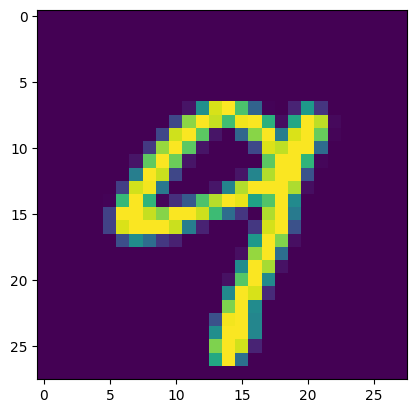

In [15]:
plt.imshow(x_test[15])

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

282/282 - 0s - 685us/step - accuracy: 0.9757 - loss: 0.2903
Test Accuracy: 97.57%


In [17]:
model.save("./mnist_oracle.keras")